In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

matplotlib.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from homer_preprocessing import read_homer_gene_exp, import_homer_diffgene, pull_comparisons_get_diff
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano, plot_exp_rpkm, gene_list_bar_plot

In [2]:
workingDirectory = '/home/h1bennet/strains_rna/results/S01_Strains_AMLN30weeks_Stellate_RNA/'
dataDirectory = '/home/h1bennet/strains/data/RNA/AMLN_30week_stellate/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)


# Check qc stats

In [3]:
qc = ngs_qc(dataDirectory)

/home/h1bennet/strains/data/RNA/AMLN_30week_stellate//
./AMLN_30week_stellate_qc/


<Figure size 432x288 with 0 Axes>

In [4]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,frac_unmappedReads_mismatch,frac_unmappedReads_short,frac_unmappedReads_other,uniquelyMappedFraction,mappedFraction
NCoRWT_Stellate_RNA_AMLNDiet_30week_LN136C_160919,6576118.0,75.0,0.006846,2.833,0.535,20230955.0,18627981.0,1313941.0,0.0,0.0075,0.0015,0.920766,0.9910
NCoRWT_Stellate_RNA_AMLNDiet_30week_LN141A_160921,6291304.0,75.0,0.006919,2.992,0.513,20257885.0,18824376.0,1087178.0,0.0,0.0104,0.0017,0.929237,0.9879
aj_Stellate_RNA_AMLNDiet_30week_AJ3c_160928,3448777.0,75.0,0.005989,4.725,-1.000,18682105.0,16295238.0,1491094.0,0.0,0.0357,0.0045,0.872238,0.9598
aj_Stellate_RNA_AMLNDiet_30week_AJ3d_160928,7327742.0,75.0,0.007609,2.826,-1.000,23131476.0,20706921.0,1994070.0,0.0,0.0053,0.0052,0.895184,0.9895
balbc_Stellate_RNA_AMLNDiet_30week_Balb3a_160928,6623060.0,75.0,0.007995,3.285,-1.000,24601509.0,21757514.0,2441818.0,0.0,0.0033,0.0051,0.884398,0.9916
balbc_Stellate_RNA_AMLNDiet_30week_Balb3d_160928,7170478.0,75.0,0.007052,2.677,-1.000,21915375.0,19193474.0,2069686.0,0.0,0.0126,0.0066,0.875799,0.9808


# Run Oyoung's pipeline to process RNA-seq data consistantly.

In [5]:
c57_paths = list(np.sort(glob.glob(dataDirectory+'/NCoRWT*')))
balbc_paths = list(np.sort(glob.glob(dataDirectory+'/balb*')))
aj_paths = list(np.sort(glob.glob(dataDirectory+'/aj*')))

In [6]:
c57_ids = [i.split('/')[-1].split('_')[5] for i in c57_paths]
balbc_ids = [i.split('/')[-1].split('_')[5] for i in balbc_paths]
aj_ids = [i.split('/')[-1].split('_')[5] for i in aj_paths]

In [7]:
ids = ['c57_stellate_amlndiet_30weeks',
       'balbc_stellate_amlndiet_30weeks',
       'aj_stellate_amlndiet_30weeks']
colors = ['#006d2c',
          '#08519c',
          '#a50f15']
paths = [';'.join(c57_paths),
         ';'.join(balbc_paths),
         ';'.join(aj_paths)]
short_ids = [';'.join([ids[0]+'_'+i for i in c57_ids]),
             ';'.join([ids[1]+'_'+i for i in balbc_ids]),
             ';'.join([ids[2]+'_'+i for i in aj_ids])]

In [8]:
pd.DataFrame([ids,colors,paths,short_ids]).T.to_csv('./sampleDef.txt',
                                                    sep='\t',
                                                    header=False,
                                                    index=False)

# Run O'young RNA pipeline

Run the code below in BASH

    source activate r-ouyangPipe
    
    mkdir ./expression/
    
    mkdir ./differential/
    
    rnaQuan.R ./sampleDef.txt -o ./expression/

    rnaDiff.R ./sampleDef.txt -c ./expression/rawC.txt \
    -t ./expression/rawT.txt -o ./differential/

    # annotate scatter files with tag counts
    for scatter in ./differential/*scatter.txt;
    do diff2Homer.R -d $scatter -q ./expression/HOMER.rawTPM.txt;
    done

### Make sure to check the PCA pdf file for outliers

# Import differential gene files for examination and plotting

## Write differential genes to list for metascape

In [9]:
if not os.path.isdir('./gene_lists/'):
    os.mkdir('./gene_lists')

In [10]:
strains = ['aj', 'balb', 'c57']
log2fc = 1
padj = 0.05

In [11]:
gene_list_dict ={}

In [25]:
for strain in strains:
    # initialize gene lists
    g_intersect = set()
    g_union = set()
    for i in glob.glob('./differential/'+strain+'*homer.txt'):
        print(i)
        # read in gene expression data
        df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
            depath=i,
            gepath='./expression/HOMER.rawTPM.txt',
            gene_name_index=True)

        # select differential genes
        df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
        sig_genes = df.index[(df['padj'] < padj) & (df['log2FoldChange'] <= -log2fc)].to_list()
        
        # add to sets
        if len(g_union) == 0:
            g_union = set(sig_genes)
            g_intersect = set(sig_genes)
        else:
            g_union = g_union.union(sig_genes)
            g_intersect = g_intersect.intersection(sig_genes)
        
        # print('union set length:', print(len(g_union)))
        # print('intersection set length:', print(len(g_intersect)))
    
    # after getting union and intersection sets add to dict
    gene_list_dict[strain+'_union'] = list(g_union)
    gene_list_dict[strain+'_intersection'] = list(g_intersect)
        

./differential/aj_stellate_amlndiet_30weeks.vs.balbc_stellate_amlndiet_30weeks.scatter.homer.txt
ge all transcripts (24940, 13)
Diff Gene selected transcripts (7889, 14)
ge selected transcripts (7889, 13)
./differential/aj_stellate_amlndiet_30weeks.vs.c57_stellate_amlndiet_30weeks.scatter.homer.txt
ge all transcripts (24940, 13)
Diff Gene selected transcripts (8876, 14)
ge selected transcripts (8876, 13)
./differential/balbc_stellate_amlndiet_30weeks.vs.aj_stellate_amlndiet_30weeks.scatter.homer.txt
ge all transcripts (24940, 13)
Diff Gene selected transcripts (7889, 14)
ge selected transcripts (7889, 13)
./differential/balbc_stellate_amlndiet_30weeks.vs.c57_stellate_amlndiet_30weeks.scatter.homer.txt
ge all transcripts (24940, 13)
Diff Gene selected transcripts (8986, 14)
ge selected transcripts (8986, 13)
./differential/c57_stellate_amlndiet_30weeks.vs.balbc_stellate_amlndiet_30weeks.scatter.homer.txt
ge all transcripts (24940, 13)
Diff Gene selected transcripts (8986, 14)
ge selecte

In [26]:
for key in gene_list_dict.keys():
    print(key)
    print(len(gene_list_dict[key]), 'genes')
    with open('./gene_lists/'+key+'_stellate_amln_genes_fc_'+str(log2fc)+'_pval_'+str(padj)+'.txt', 'w') as f:
        f.write('Gene\n')
        for i in gene_list_dict[key]:
            f.write(i+'\n')
        f.close()


aj_union
1440 genes
aj_intersection
61 genes
balb_union
1553 genes
balb_intersection
185 genes
c57_union
1339 genes
c57_intersection
642 genes


# Plot potential nichenet ligands

In [27]:
if not os.path.isdir('./figures/'):
    os.mkdir('./figures')

Read in raw expression values

In [28]:
tpm_mat = pd.read_csv('./expression/rawT.txt', sep='\t', index_col=0)

Read in nichenet ligand list

In [29]:
ligands = pd.read_csv('/home/h1bennet/data/gene_lists/nichenet_ligands.txt',
                      sep='\t')['x'].str.capitalize().tolist()
ligands[:5]

['Cxcl1', 'Cxcl2', 'Cxcl3', 'Cxcl5', 'Ppbp']

### Intersection gene set

In [30]:
act = []
for key in gene_list_dict.keys():
    if 'intersection' in key:
        act.extend(gene_list_dict[key])

act = set(act)
# overlap with ligands
act_ligands = act.intersection(ligands)

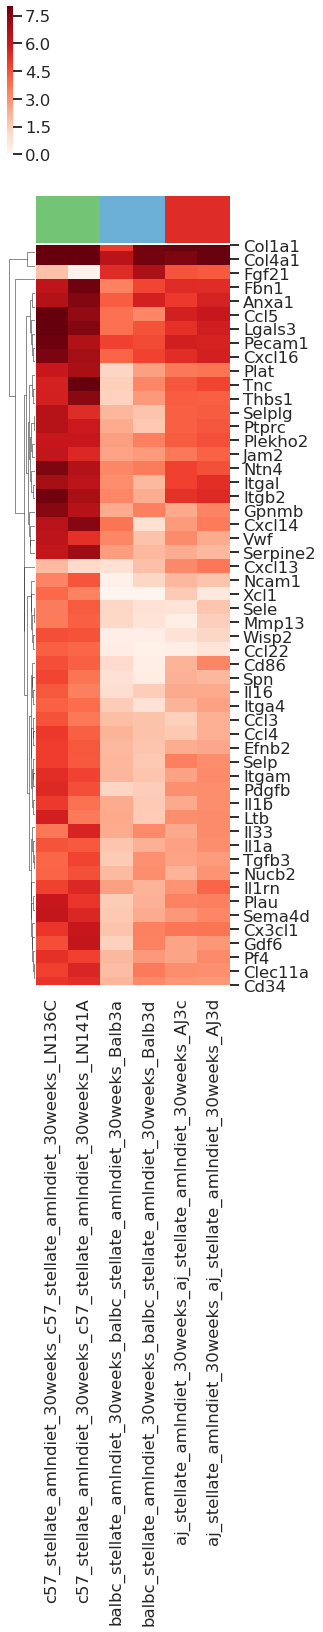

In [33]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    #z_score=0,
    cmap='Reds',
    #vmin=-2,
    vmax=8,
    col_colors = ['#74c476', '#74c476',
                  '#6baed6', '#6baed6',
                  '#de2d26', '#de2d26'],
    figsize=(4,18),
    yticklabels=1)

plt.savefig('./figures/diff_genes_intersection_ligands_clustermap.png', bbox_inches='tight')
# plt.close()

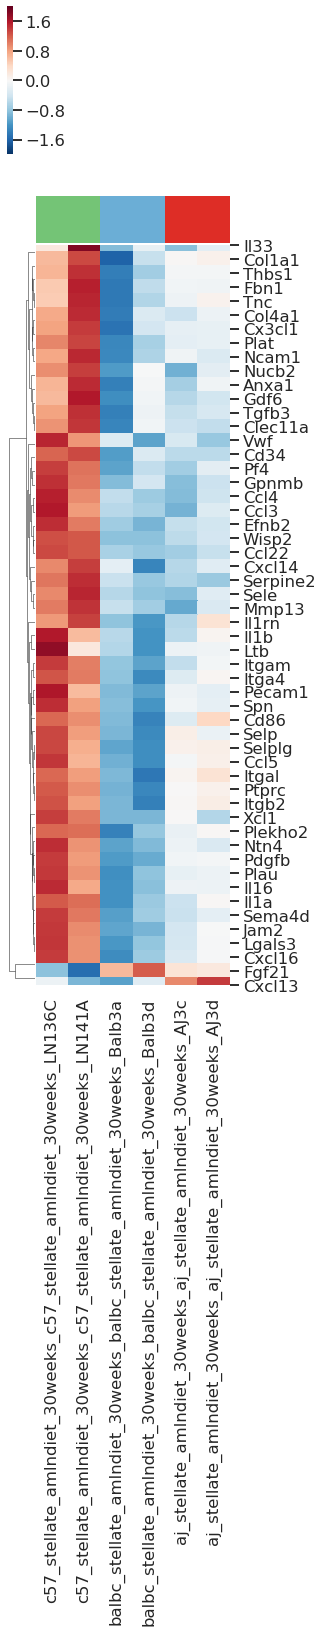

In [34]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    z_score=0,
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    col_colors = ['#74c476', '#74c476',
                  '#6baed6', '#6baed6',
                  '#de2d26', '#de2d26'],
    figsize=(4,18),
    yticklabels=1)

plt.savefig('./figures/diff_genes_intersection_ligands_clustermap_zscore.png', bbox_inches='tight')
# plt.close()

# Look at union gene set

In [35]:
act = []
for key in gene_list_dict.keys():
    if 'union' in key:
        act.extend(gene_list_dict[key])

act = set(act)
# overlap with ligands
act_ligands = act.intersection(ligands)

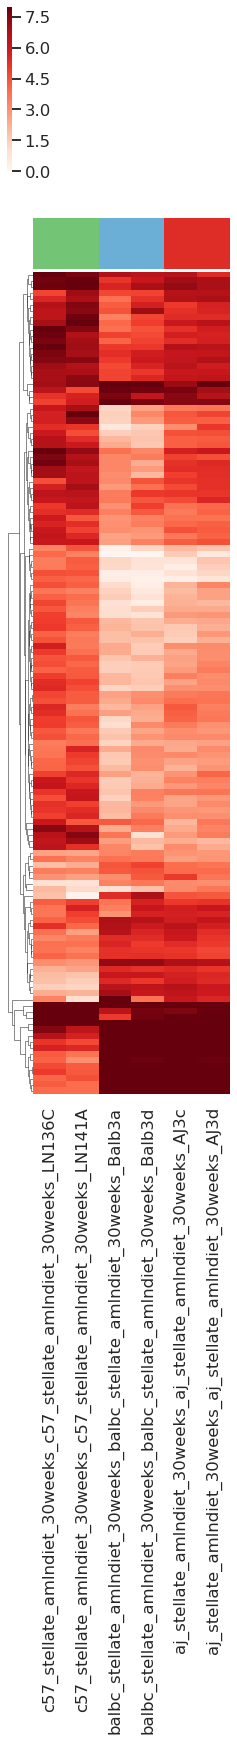

In [37]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    #z_score=0,
    cmap='Reds',
    #vmin=-2,
    vmax=8,
    col_colors = ['#74c476', '#74c476',
                  '#6baed6', '#6baed6',
                  '#de2d26', '#de2d26'],
    figsize=(4,20),
    yticklabels=0)

plt.savefig('./figures/diff_genes_union_ligands_clustermap.png', bbox_inches='tight')
# plt.close()

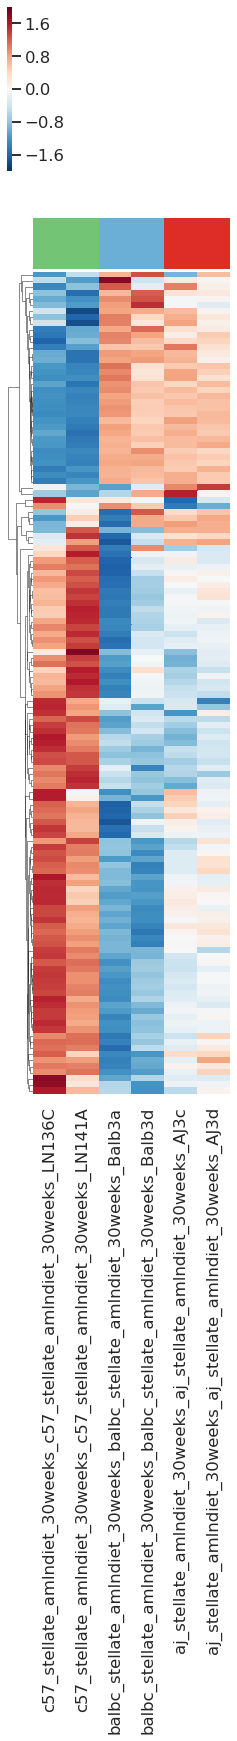

In [38]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    z_score=0,
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    col_colors = ['#74c476', '#74c476',
                  '#6baed6', '#6baed6',
                  '#de2d26', '#de2d26'],
    figsize=(4,20),
    yticklabels=0)

plt.savefig('./figures/diff_genes_union_ligands_clustermap_zscore.png', bbox_inches='tight')
# plt.close()